# Model Building

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
from math import sqrt

%matplotlib inline

In [187]:
merged_train = pd.read_pickle("merged_train-processed.pkl")

In [188]:
cols = merged_train.columns

In [189]:
targets = ["m1","m2","m3","m4","m5","m6"]

In [190]:
target_id = [merged_train.columns.get_loc(c) for c in targets if c in merged_train]

In [191]:
cols = cols.delete([target_id])[1:]
cols

Index(['Deposit', 'AccessoryRate', 'RatePerUnit', 'DaysOnDeposit', 'Age',
       'Term', 'TotalContractValue', 'DaysLate', 'ExpectedTerm',
       'TotalPastPayments', '2015-11-01', '2015-12-01', '2016-01-01',
       '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
       '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
       '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
       '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
       '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
       '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
       '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
       '2020-04-01', 

In [192]:
scaler = StandardScaler()
df_train = pd.DataFrame(scaler.fit_transform(merged_train.loc[:,cols]), columns=cols)
df_train.head()

,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue,DaysLate,ExpectedTerm,TotalPastPayments,...,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
0,-0.832051,-0.147092,-0.249995,0.710891,0.171831,-0.385388,-0.800428,-1.093100,-1.223923,-0.958286,...,-0.566504,-0.699127,-0.66509,-0.595409,-0.554049,-0.490724,-0.467013,-0.403376,-0.318614,-0.314054
1,-0.832051,4.258780,-0.249995,0.710891,0.798508,-0.155854,0.646890,-1.024033,-0.934337,-0.443659,...,-0.566504,-0.699127,-0.66509,-0.595409,-0.554049,-0.490724,-0.467013,-0.403376,-0.318614,-0.314054
2,-0.832051,-0.147092,-0.249995,0.710891,1.514711,-0.385388,-0.800428,-0.500580,-0.582475,-0.536804,...,-0.566504,-0.699127,-0.66509,-0.595409,-0.554049,-0.490724,-0.467013,-0.403376,-0.318614,-0.314054
3,-0.832051,-0.147092,-0.249995,0.710891,1.514711,-0.385388,-0.800428,-1.082195,-1.071346,-0.763845,...,-0.566504,-0.699127,-0.66509,-0.595409,-0.554049,-0.490724,-0.467013,-0.403376,-0.318614,-0.314054
4,-0.832051,-0.147092,-0.249995,0.710891,0.171831,-0.385388,-0.800428,-0.984047,-0.987272,-0.388936,...,-0.566504,-0.699127,-0.66509,-0.595409,-0.554049,-0.490724,-0.467013,-0.403376,-0.318614,-0.314054


In [193]:
pca = PCA()

In [194]:
pc_scores = pca.fit_transform(df_train)

In [195]:
PC_NUMBERS = np.arange(1, df_train.shape[1]+1)
PC_LABELS = ['PC'+str(i) for i in PC_NUMBERS]

In [196]:
pc_scores = pd.DataFrame(pc_scores, columns=PC_LABELS)
pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71
0,-4.386144,29.492241,8.080381,-19.448508,-0.009091,-0.272975,0.440561,2.376148,6.271677,-1.194629,...,-0.441168,-2.063446,-13.222681,13.284527,0.134687,-10.673688,4.592927,0.106245,0.063152,1.097346e-13
1,-4.596801,53.106305,15.589855,-29.925978,1.002909,0.349171,1.364877,2.107738,-0.518124,1.334320,...,0.100662,0.939777,6.358410,4.575611,-0.562837,-2.519604,-1.293071,0.440029,-0.017119,6.738342e-15
2,-5.159054,51.058277,14.774789,-15.318449,0.749477,0.354668,-0.856290,-5.640169,-15.367248,2.919024,...,7.139340,-0.220221,0.542539,6.068503,-0.092716,-1.632929,5.192788,0.043491,-0.009589,-3.433110e-14
3,-4.913655,41.290077,11.617834,-27.066147,0.542392,-0.036791,0.862430,3.387128,7.650989,-0.933623,...,-6.089216,0.504396,3.185728,0.031138,0.040394,1.907517,-0.873868,-0.049683,-0.007178,1.323380e-13
4,-5.447163,53.461849,15.625769,-31.973735,0.872035,0.134393,0.808984,2.909928,6.420669,-0.884365,...,-4.279674,0.271499,1.287108,-2.826475,-0.127348,-0.347009,-1.475146,0.053107,0.003140,-2.052684e-14


In [197]:
variance_explained = pd.DataFrame(
    {
        'PC': PC_NUMBERS,
        'Proportion': pca.explained_variance_ratio_
    }
)
variance_explained["Cumulative"] = variance_explained.Proportion.cumsum()

Text(0.5, 1.0, 'Scree Plot')

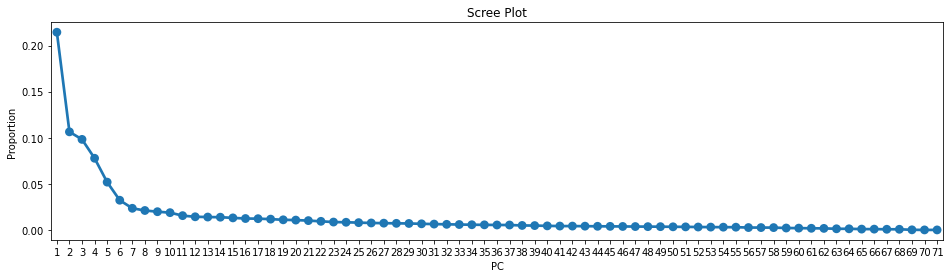

In [198]:
    plt.figure(figsize=(16, 4))
    sns.pointplot(
        x="PC", y="Proportion",
        data=variance_explained
    ).set_title('Scree Plot')

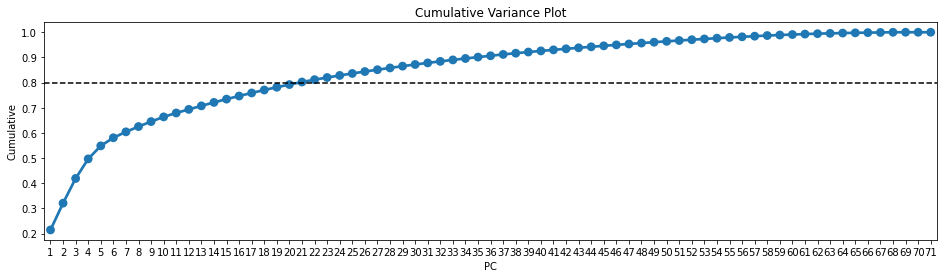

In [199]:
plt.figure(figsize=(16, 4))
plot = sns.pointplot(
    x="PC", y="Cumulative",
    data=variance_explained
)
plot.set_title('Cumulative Variance Plot')
plot.axhline(0.80, color = "black", linestyle='--')

In [200]:
new_features = pc_scores.iloc[:,:20]
new_features

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-4.386144,29.492241,8.080381,-19.448508,-0.009091,-0.272975,0.440561,2.376148,6.271677,-1.194629,-3.997085,-5.042111,-0.692426,-6.259252,-1.107595,1.456122,1.578566,1.131818,-0.709823,1.525186
1,-4.596801,53.106305,15.589855,-29.925978,1.002909,0.349171,1.364877,2.107738,-0.518124,1.334320,3.558833,7.708497,-2.054349,-8.705943,-0.206047,0.816914,0.456371,1.037724,0.217195,0.612541
2,-5.159054,51.058277,14.774789,-15.318449,0.749477,0.354668,-0.856290,-5.640169,-15.367248,2.919024,2.854393,5.418082,-0.475703,-0.686689,0.289212,-0.708276,-0.022660,-0.688329,0.139555,-0.007202
3,-4.913655,41.290077,11.617834,-27.066147,0.542392,-0.036791,0.862430,3.387128,7.650989,-0.933623,-4.537578,-6.130662,-1.381706,-8.800071,-1.344322,1.265577,2.251759,0.851548,-0.988136,1.450864
4,-5.447163,53.461849,15.625769,-31.973735,0.872035,0.134393,0.808984,2.909928,6.420669,-0.884365,-2.561664,-0.741234,-3.001048,-12.954010,-0.575853,1.626752,0.617938,1.542182,-0.163911,-0.068030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26519,-3.697913,-1.087378,2.493440,-0.053726,-1.850264,-1.129381,0.747934,-0.217845,0.082088,0.540452,0.397376,-0.405119,-1.090894,0.082382,0.306995,-0.113025,-0.651469,-0.593656,0.142673,1.168860
26520,-3.803344,-1.177279,2.724275,-0.061892,-2.135037,-1.563231,0.912248,-0.279160,0.126383,0.760963,0.635403,-0.506968,-1.063834,0.043302,0.364283,-0.114053,-0.481715,-0.475284,0.078149,1.612473
26521,-3.760063,-1.667555,4.146063,0.008764,-0.834618,1.670865,0.780939,0.671236,-0.384484,-0.309534,0.167127,-0.446400,-1.638978,0.218070,0.759857,0.441950,-1.683089,0.146222,0.529958,-0.480006
26522,-3.305985,-1.868756,4.798925,0.001357,-0.685058,2.785521,1.039310,0.981686,-0.447599,0.178690,-0.707084,-0.096275,-1.932277,0.389596,0.666804,0.169035,-1.473916,-0.273977,0.777762,0.667735


In [201]:
model = LinearRegression()

cv_scores = cross_val_score(
    estimator=model,
    X=new_features,
    y=merged_train["m2"],
    scoring="neg_root_mean_squared_error",
    cv=10
)

cv_scores

array([-12227.91479218,   -398.37496964,   -353.37899896,   -545.90886509,
         -510.21402554,   -467.52597257,   -520.92091349,   -474.25260708,
         -395.62238388,   -475.1104508 ])

In [202]:
cv_scores = -cv_scores

In [203]:
(cv_scores.mean(), cv_scores.std())

(1636.9223979234587, 3530.8039686488073)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(new_features, merged_train["m2"], random_state=13)

In [205]:
model = LinearRegression()

In [206]:
model.fit(X_train,y_train)

LinearRegression()

In [207]:
y_pred = model.predict(X_test)
y_pred

array([ 799.52019171, 2253.72344276,  752.25264801, ..., 1030.50971274,
        900.19116598,  821.61727616])

In [210]:
mse = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

193721.18897000139

In [209]:
sqrt(mse)

440.13769319384744